In [1]:
#csv파일 다루기

In [7]:
import csv #csv 파일을 불러오기 위한 모듈(reader와 writer제공)
with open("Demographic_Statistics_By_Zip_Code.csv") as infile: #예제 파일 불러오기
    data = list(csv.reader(infile))
    
countParticipantsIndex = data[0].index("COUNT PARTICIPANTS")  #count participants의 위치값을 변수 안에 넣어줌.
print(countParticipantsIndex)

import statistics   # 통계 계산을 위해 모듈을 새로 불러와야함

countParticipants = [int(row[countParticipantsIndex])
            for row in data [1:]] #count participants 줄에 있는 값 모두 변수에 저장.
print(statistics.mean(countParticipants), statistics.stdev(countParticipants)) #평균, 표준편차 구하기

1
17.661016949152543 43.27973735299687


In [12]:
import pandas as pd
df1 = pd.DataFrame({'A':[10,20,30,40], #데이터 프레임 만들기
                   'B':[1,3,5,7],
                   'C':[2,4,6,8],
                   'D':[2,3,5,7]},
                   index=[0,1,2,3])
df1

,A,B,C,D
0,10,1,2,2
1,20,3,4,3
2,30,5,6,5
3,40,7,8,7


In [13]:
df2=pd.DataFrame({'B':[19,17,13,11],
                   'C':[2,3,5,7],
                   'D':[22,24,26,28],
                   'E':[23,33,53,3]},
                   index=[2,4,6,7])
df2

,B,C,D,E
2,19,2,22,23
4,17,3,24,33
6,13,5,26,53
7,11,7,28,3


In [14]:
df1.sum() #컬럼별 덧셈

A    100
B     16
C     20
D     17
dtype: int64

In [15]:
df1.sum(axis=1)#행별 덧셈

0    15
1    30
2    46
3    62
dtype: int64

In [16]:
df1.mean() #평균

A    25.00
B     4.00
C     5.00
D     4.25
dtype: float64

In [18]:
df1.mean(axis=1)

0     3.75
1     7.50
2    11.50
3    15.50
dtype: float64

In [22]:
df1.idxmax()

A    3
B    3
C    3
D    3
dtype: int64

In [21]:
df1.idxmin()

A    0
B    0
C    0
D    0
dtype: int64

In [23]:
df1.cumsum()#누적합

,A,B,C,D
0,10,1,2,2
1,30,4,6,5
2,60,9,12,10
3,100,16,20,17


In [24]:
df2.var() #분산

B     13.333333
C      4.916667
D      6.666667
E    433.333333
dtype: float64

In [25]:
df2.std() #표준편차

B     3.651484
C     2.217356
D     2.581989
E    20.816660
dtype: float64

In [26]:
df2.diff() #1차 산술차를 구함 (두 값의 차이)

,B,C,D,E
2,NaN,NaN,NaN,NaN
4,-2.0,1.0,2.0,10.0
6,-4.0,2.0,2.0,20.0
7,-2.0,2.0,2.0,-50.0


In [28]:
df2.describe() #기본통계값

,B,C,D,E
count,4.000000,4.000000,4.000000,4.00000
mean,15.000000,4.250000,25.000000,28.00000
std,3.651484,2.217356,2.581989,20.81666
min,11.000000,2.000000,22.000000,3.00000
25%,12.500000,2.750000,23.500000,18.00000
50%,15.000000,4.000000,25.000000,28.00000
75%,17.500000,5.500000,26.500000,38.00000
max,19.000000,7.000000,28.000000,53.00000


In [30]:
result = pd.concat([df1,df2]) #데이터를 열방향으로 단순히 더함
result

,A,B,C,D,E
0,10.0,1,2,2,NaN
1,20.0,3,4,3,NaN
2,30.0,5,6,5,NaN
3,40.0,7,8,7,NaN
2,NaN,19,2,22,23.0
4,NaN,17,3,24,33.0
6,NaN,13,5,26,53.0
7,NaN,11,7,28,3.0


In [31]:
result =pd.concat([df1,df2],keys =['x','y']) #keys 옵션으로 다중 index가 되어 level형성
result

A   B  C   D     E
x 0  10.0   1  2   2   NaN
  1  20.0   3  4   3   NaN
  2  30.0   5  6   5   NaN
  3  40.0   7  8   7   NaN
y 2   NaN  19  2  22  23.0
  4   NaN  17  3  24  33.0
  6   NaN  13  5  26  53.0
  7   NaN  11  7  28   3.0

In [32]:
result.index #인덱스 확인

MultiIndex(levels=[['x', 'y'], [0, 1, 2, 3, 4, 6, 7]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 2, 4, 5, 6]])

In [33]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y'], dtype='object')

In [35]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 2, 4, 6, 7], dtype='int64')

In [37]:
result =pd.concat([df1,df2],axis=1) #axis=1를 쓰면 가로로 더해짐, 값이 없는 곳에는 nan으로
result

,A,B,C,D,B,C,D,E
0,10.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN
1,20.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN
2,30.0,5.0,6.0,5.0,19.0,2.0,22.0,23.0
3,40.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,17.0,3.0,24.0,33.0
6,NaN,NaN,NaN,NaN,13.0,5.0,26.0,53.0
7,NaN,NaN,NaN,NaN,11.0,7.0,28.0,3.0


In [38]:
result = pd.concat([df1,df2], axis=1, join ='inner') #join='inner' : 공통된 index는 합치고 나머지는 버림
result

,A,B,C,D,B,C,D,E
2,30,5,6,5,19,2,22,23


In [40]:
df3 = pd.DataFrame({'K':[19,17,13,11],
                   'A':[2,3,5,7],
                   'B':[23,33,53,3]})
df3

,A,B,K
0,2,23,19
1,3,33,17
2,5,53,13
3,7,3,11


In [42]:
df4 = pd.DataFrame({'K':[29,21,19,11],
                   'C':[2,4,6,8],
                   'D':[2,3,5,7]})
df4

,C,D,K
0,2,2,29
1,4,3,21
2,6,5,19
3,8,7,11


In [45]:
pd.merge(df3,df4,on='K') #공통컬럼인 K를 기준으로 합침,공통되는 값만 더해짐(즉 19,11만)
                            #(concat은 index를 기준으로)

,A,B,K,C,D
0,2,23,19,6,5
1,7,3,11,8,7


In [46]:
pd.merge(df3,df4,how='outer',on='K')  #outer를 쓰면 merge한 데이터 결과를 모두 가짐

,A,B,K,C,D
0,2.0,23.0,19,6.0,5.0
1,3.0,33.0,17,NaN,NaN
2,5.0,53.0,13,NaN,NaN
3,7.0,3.0,11,8.0,7.0
4,NaN,NaN,29,2.0,2.0
5,NaN,NaN,21,4.0,3.0


In [48]:
pd.merge(df3,df4,how='inner',on='K') #inner은 공통된 데이터만  ,
                                    #how를 따로 지정하지 않으면 inner로 합쳐지는 걸로 보면 됨

,A,B,K,C,D
0,2,23,19,6,5
1,7,3,11,8,7


In [2]:
import pandas as pd

CCTV_seoul = pd.read_csv('01.cctv_in_seoul.csv', encoding ='utf-8') #read_csv로 csv 파일 불러오기
CCTV_seoul.info() #파일의 정보 불러오기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
기관명          25 non-null object
소계           25 non-null int64
2013년도 이전    25 non-null int64
2014년        25 non-null int64
2015년        25 non-null int64
2016년        25 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [3]:
CCTV_seoul.head() #위 5행만 출력, ()안에 숫자를 지정해주면 원하는 행만큼 볼 수 있음

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
CCTV_seoul.tail() #아래 5행만 출력

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [5]:
CCTV_seoul.columns #컬럼명 확인

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
CCTV_seoul.columns[0] #인덱스 지정해서 컬럼명 확인

'기관명'

In [8]:
CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:"구별"},inplace=True) #이름 변경,
                                        #inplace=True를 써야 불러온 파일의 설정이 변경이 됨(파일에 영향 x)

In [9]:
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
CCTV_seoul.describe() #기본 통계값 확인

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,764.760000,159.480000,205.200000,385.880000
std,616.774656,415.510257,104.132976,137.877059,182.479981
min,825.000000,238.000000,21.000000,30.000000,81.000000
25%,1010.000000,464.000000,78.000000,103.000000,292.000000
50%,1327.000000,573.000000,142.000000,184.000000,377.000000
75%,1884.000000,1070.000000,218.000000,269.000000,467.000000
max,3238.000000,1843.000000,430.000000,584.000000,932.000000


In [61]:
CCTV_seoul.sort_values(by="소계",ascending=True).head(10) #sort_value : by로 지정된 컬럼을 기준으로 정렬
#ascending은 true일때 오름차순 false일땐 내림차순

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [11]:
CCTV_seoul['최근증가율'] = (CCTV_seoul['2016년']+CCTV_seoul['2015년']+CCTV_seoul['2014년'])/CCTV_seoul['2013년도 이전']*100
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [63]:
CCTV_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [13]:
import pandas as pd

Crime_seoul = pd.read_excel('crime_seoul.xls',encoding='utf-8')
Crime_seoul.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2016,합계,117839,84421,148,147,262,257,6002,5565,46857,22566,64570,55886
2,2016,종로구,4459,4298,6,5,12,14,238,1106,1940,1020,2263,2153
3,2016,중구,4584,3068,3,3,8,7,198,148,2150,914,2225,1996
4,2016,용산구,4137,2835,4,4,9,10,251,214,1489,599,2384,2008


In [14]:
Crime_seoul = pd.read_excel('crime_seoul.xls', usecols ='B,C,E,G,I,K,M',encoding='utf-8')
Crime_seoul.head()

,자치구,합계,살인,강도,강간강제추행,절도,폭력
0,자치구,발생,발생,발생,발생,발생,발생
1,합계,117839,148,262,6002,46857,64570
2,종로구,4459,6,12,238,1940,2263
3,중구,4584,3,8,198,2150,2225
4,용산구,4137,4,9,251,1489,2384


In [15]:
Crime_seoul.drop([0,1],inplace=True) #0,1 번 행 삭제, 변수의 내용도 변경
Crime_seoul.head() 

,자치구,합계,살인,강도,강간강제추행,절도,폭력
2,종로구,4459,6,12,238,1940,2263
3,중구,4584,3,8,198,2150,2225
4,용산구,4137,4,9,251,1489,2384
5,성동구,3026,4,3,104,1296,1619
6,광진구,5322,4,11,279,2636,2392


In [17]:
Crime_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 26
Data columns (total 7 columns):
자치구       25 non-null object
합계        25 non-null object
살인        25 non-null object
강도        25 non-null object
강간강제추행    25 non-null object
절도        25 non-null object
폭력        25 non-null object
dtypes: object(7)
memory usage: 1.6+ KB


In [18]:
Crime_seoul.columns

Index(['자치구', '합계', '살인', '강도', '강간강제추행', '절도', '폭력'], dtype='object')

In [19]:
Crime_seoul.columns[0]

'자치구'

In [20]:
Crime_seoul.rename(columns={Crime_seoul.columns[0]:"구별"}, inplace=True)
Crime_seoul.head()

,구별,합계,살인,강도,강간강제추행,절도,폭력
2,종로구,4459,6,12,238,1940,2263
3,중구,4584,3,8,198,2150,2225
4,용산구,4137,4,9,251,1489,2384
5,성동구,3026,4,3,104,1296,1619
6,광진구,5322,4,11,279,2636,2392


In [21]:
Crime_seoul['살인율']=(Crime_seoul['살인']/Crime_seoul['합계'])*100
Crime_seoul['강도율']=(Crime_seoul['강도']/Crime_seoul['합계'])*100
Crime_seoul['강추율']=(Crime_seoul['강간강제추행']/Crime_seoul['합계'])*100
Crime_seoul['절도율']=(Crime_seoul['절도']/Crime_seoul['합계'])*100
Crime_seoul['폭력율']=(Crime_seoul['폭력']/Crime_seoul['합계'])*100
Crime_seoul.head()

,구별,합계,살인,강도,강간강제추행,절도,폭력,살인율,강도율,강추율,절도율,폭력율
2,종로구,4459,6,12,238,1940,2263,0.134559,0.269119,5.33752,43.5075,50.7513
3,중구,4584,3,8,198,2150,2225,0.065445,0.17452,4.31937,46.9023,48.5384
4,용산구,4137,4,9,251,1489,2384,0.0966884,0.217549,6.0672,35.9923,57.6263
5,성동구,3026,4,3,104,1296,1619,0.132188,0.0991408,3.43688,42.8288,53.503
6,광진구,5322,4,11,279,2636,2392,0.0751597,0.206689,5.24239,49.5303,44.9455


In [22]:
Crime_seoul['구별'].unique() #하나 이상 나타난 데이터 확인

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [23]:
data_result = pd.merge(CCTV_seoul,Crime_seoul,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,합계,살인,강도,강간강제추행,절도,폭력,살인율,강도율,강추율,절도율,폭력율
0,강남구,3238,1292,430,584,932,150.619195,8149,5,39,516,3587,4002,0.0613572,0.478586,6.33207,44.0177,49.1103
1,강동구,1010,379,99,155,377,166.490765,4462,4,14,160,1754,2530,0.0896459,0.313761,3.58584,39.3097,56.701
2,강북구,831,369,120,138,204,125.203252,4229,7,5,217,1222,2778,0.165524,0.118231,5.13124,28.8957,65.6893
3,강서구,911,388,258,184,81,134.793814,5450,9,10,275,1952,3204,0.165138,0.183486,5.04587,35.8165,58.789
4,관악구,2109,846,260,390,613,149.290780,5678,6,12,322,2103,3235,0.105671,0.211342,5.67101,37.0377,56.9743


In [24]:
data_result.rename(columns={data_result.columns[1]:"CCTV설치소계",
                    data_result.columns[7]:"범죄소계"},inplace=True)
data_result.head()

,구별,CCTV설치소계,2013년도 이전,2014년,2015년,2016년,최근증가율,범죄소계,살인,강도,강간강제추행,절도,폭력,살인율,강도율,강추율,절도율,폭력율
0,강남구,3238,1292,430,584,932,150.619195,8149,5,39,516,3587,4002,0.0613572,0.478586,6.33207,44.0177,49.1103
1,강동구,1010,379,99,155,377,166.490765,4462,4,14,160,1754,2530,0.0896459,0.313761,3.58584,39.3097,56.701
2,강북구,831,369,120,138,204,125.203252,4229,7,5,217,1222,2778,0.165524,0.118231,5.13124,28.8957,65.6893
3,강서구,911,388,258,184,81,134.793814,5450,9,10,275,1952,3204,0.165138,0.183486,5.04587,35.8165,58.789
4,관악구,2109,846,260,390,613,149.290780,5678,6,12,322,2103,3235,0.105671,0.211342,5.67101,37.0377,56.9743


In [25]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,CCTV설치소계,최근증가율,범죄소계,살인,강도,강간강제추행,절도,폭력,살인율,강도율,강추율,절도율,폭력율
0,강남구,3238,150.619195,8149,5,39,516,3587,4002,0.0613572,0.478586,6.33207,44.0177,49.1103
1,강동구,1010,166.490765,4462,4,14,160,1754,2530,0.0896459,0.313761,3.58584,39.3097,56.701
2,강북구,831,125.203252,4229,7,5,217,1222,2778,0.165524,0.118231,5.13124,28.8957,65.6893
3,강서구,911,134.793814,5450,9,10,275,1952,3204,0.165138,0.183486,5.04587,35.8165,58.789
4,관악구,2109,149.290780,5678,6,12,322,2103,3235,0.105671,0.211342,5.67101,37.0377,56.9743


In [26]:
data_result.set_index('구별', inplace=True) #index를 구 이름으로 변경, 그래프 그릴때 유용,(이전에 한번실행해서 오류뜸)

In [27]:
data_result.head()

,CCTV설치소계,최근증가율,범죄소계,살인,강도,강간강제추행,절도,폭력,살인율,강도율,강추율,절도율,폭력율
구별,,,,,,,,,,,,,
강남구,3238,150.619195,8149,5,39,516,3587,4002,0.0613572,0.478586,6.33207,44.0177,49.1103
강동구,1010,166.490765,4462,4,14,160,1754,2530,0.0896459,0.313761,3.58584,39.3097,56.701
강북구,831,125.203252,4229,7,5,217,1222,2778,0.165524,0.118231,5.13124,28.8957,65.6893
강서구,911,134.793814,5450,9,10,275,1952,3204,0.165138,0.183486,5.04587,35.8165,58.789
관악구,2109,149.290780,5678,6,12,322,2103,3235,0.105671,0.211342,5.67101,37.0377,56.9743


In [ ]:
#---------------------5.2 앞에서 한 내용 그대로

In [32]:
import numpy as np #넘파이는 다차원 배열, 수학적인 작업을 위해 함수 제공

In [35]:
np.corrcoef(data_result['범죄소계'],data_result['CCTV설치소계']) #corrcoef :상관관계 분석확인,object로 되어 있음으로 에러

AttributeError: 'float' object has no attribute 'shape'

In [36]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 13 columns):
CCTV설치소계    25 non-null int64
최근증가율       25 non-null float64
범죄소계        25 non-null object
살인          25 non-null object
강도          25 non-null object
강간강제추행      25 non-null object
절도          25 non-null object
폭력          25 non-null object
살인율         25 non-null object
강도율         25 non-null object
강추율         25 non-null object
절도율         25 non-null object
폭력율         25 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 2.7+ KB


In [37]:
data_result=data_result.astype('float64') #데이터타입을 숫자로 변경

In [38]:
np.corrcoef(data_result['범죄소계'],data_result['CCTV설치소계'])#둘 사이의 상관계수 확인 :상관계수란 두 수의 연관관계

array([[1.        , 0.35498873],
       [0.35498873, 1.        ]])

In [39]:
np.corrcoef(data_result['강도'],data_result['CCTV설치소계'])#0.5 이상은 되야 상관관계가 있다고 여겨짐

array([[1.        , 0.52085471],
       [0.52085471, 1.        ]])

In [40]:
np.corrcoef(data_result['강간강제추행'],data_result['CCTV설치소계'])

array([[1.        , 0.37942678],
       [0.37942678, 1.        ]])

In [44]:
np.corrcoef(data_result['절도'],data_result['CCTV설치소계'])

array([[1.        , 0.37168544],
       [0.37168544, 1.        ]])

In [45]:
np.corrcoef(data_result['살인'],data_result['CCTV설치소계'])

array([[ 1.       , -0.1157649],
       [-0.1157649,  1.       ]])

In [46]:
np.corrcoef(data_result['폭력'],data_result['CCTV설치소계'])

array([[1.        , 0.26888007],
       [0.26888007, 1.        ]])

In [47]:
import matplotlib.pyplot as plt #matplotlib 은 배열에서 도표를 만들고 시각화하는데 필요한 베이스를 갖고 있음.
#그 중 .pyplot은 도표

In [48]:
%matplotlib inline #아나콘다에서만 사용하는 명령어, 화면에 바로 나타나게 해줌

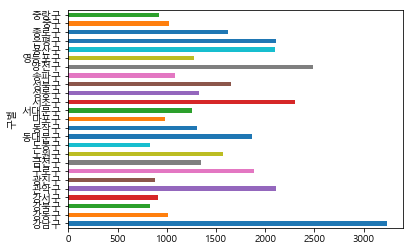

In [55]:
data_result['CCTV설치소계'].plot(kind='barh')

In [54]:
import platform 
from matplotlib import font_manager,rc
plt.rcParams['axes.unicode_minus']=False
path="C:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name) #도표시 한글이 깨질 때(한글일때는 인코딩해야되고 깨지는 거 따로 처리해줘야함)

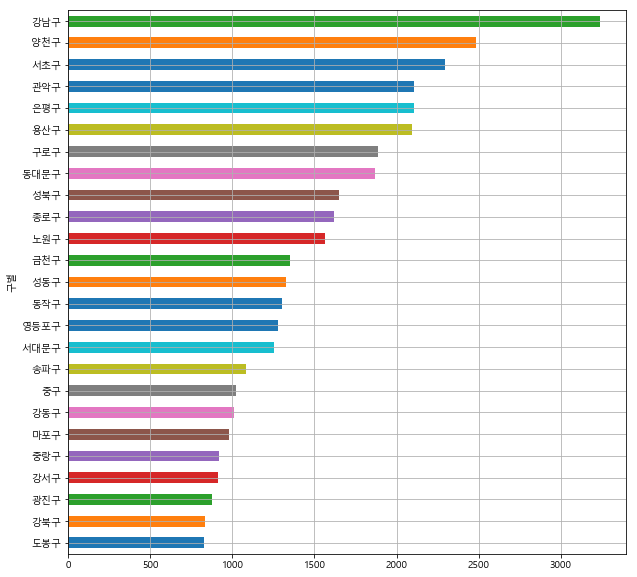

In [59]:
data_result['CCTV설치소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10)) #데이터 정렬
#kind:그래프모양 , grid: 격자표시

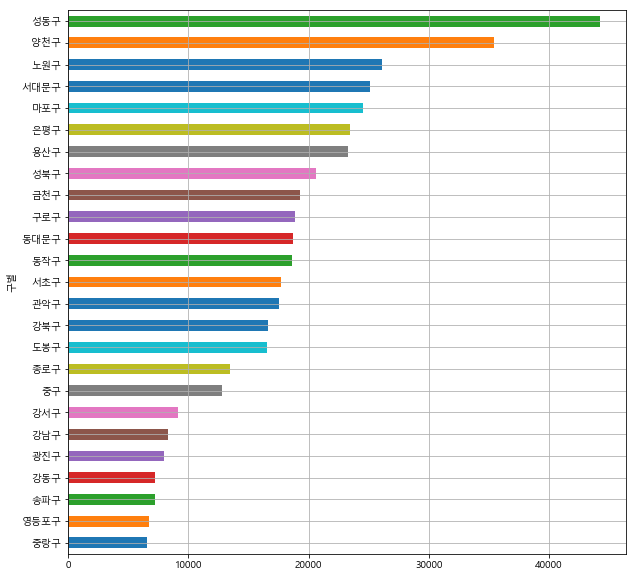

In [60]:
data_result['CCTV비율']=data_result['CCTV설치소계']/data_result['강도']*100 #강도 대비 CCTV 설치비율 컬럼 추가
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10)) #데이터정렬, 그래프그리기

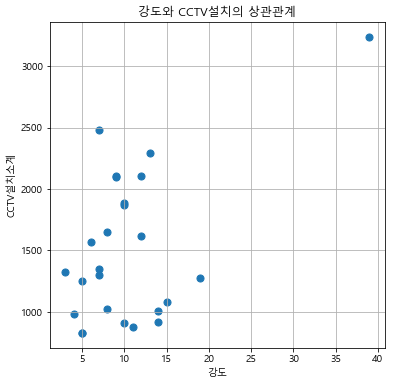

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['강도'],data_result['CCTV설치소계'],s=50) #scatter 함수사용, s: 점크기
plt.xlabel('강도')
plt.ylabel('CCTV설치소계')#x,y 정함
plt.title('강도와 CCTV설치의 상관관계')#타이틀 이름
plt.grid()

In [65]:
fp1=np.polyfit(data_result['강도'],data_result['CCTV설치소계'],1) #1차항 회귀계수 생성([기울기, 절편]), *회귀방정식
fp1

array([  45.35155783, 1040.03567395])

In [67]:
f1=np.poly1d(fp1) #y축 데이터 생성
fx=np.linspace(5,40,5) #x축 데이터 생성 5~40까지 5단위로

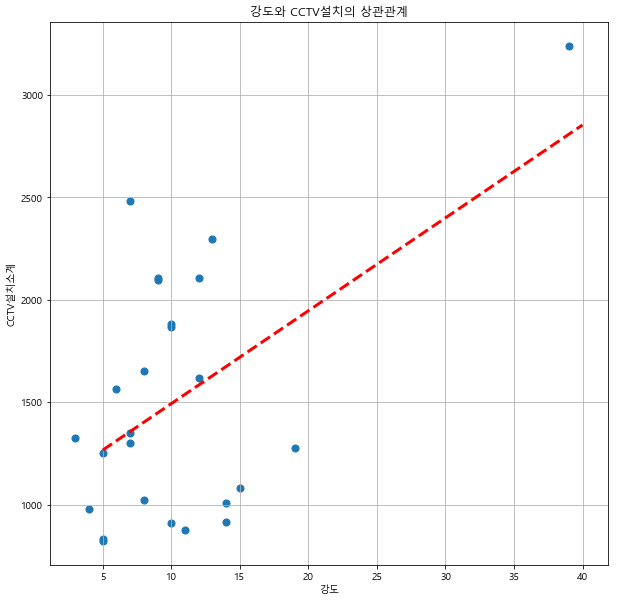

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['강도'],data_result['CCTV설치소계'],s=50) #scatter 함수사용, s: 점크기
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')#(x,y,dashed:점선,lw:line width, r=빨강)
plt.xlabel('강도')
plt.ylabel('CCTV설치소계')#x,y 정함
plt.title('강도와 CCTV설치의 상관관계')#타이틀 이름
plt.grid()

In [ ]:
#추가적인 내용_ppt참조